In [ ]:
!pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

# Initialisation de la liste pour stocker tous les hôtels
all_hotels = []

# Générer les périodes pour toute l'année 2025 (mois par mois)
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 12, 31)
delta = timedelta(days=1)  # Période d'un mois

# User-Agent pour éviter le blocage
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Boucle sur les périodes
current_date = start_date
while current_date <= end_date:
    checkin = current_date.strftime("%Y-%m-%d")
    checkout = (current_date + timedelta(days=1)).strftime("%Y-%m-%d")
    url = f"https://www.booking.com/searchresults.fr.html?ss=Paris&ssne=Paris&ssne_untouched=Paris&efdco=1&label=gen173nr-1BCAEoggI46AdIM1gEaOIBiAEBmAENuAEHyAEN2AEB6AEBiAIBqAIDuAL1v8-7BsACAdICJDUzYjUxMTJhLTIyYTMtNGYzMi05MWFjLWQyZTFlNzJmNDRhZNgCBeACAQ&sid=3d1a6e027f34951123e5dce74b1ce2c5&aid=304142&lang=fr&sb=1&src_elem=sb&src=searchresults&dest_id=-1456928&dest_type=city&checkin={checkin}&checkout={checkout}&group_adults=2&no_rooms=1&group_children=0"

    print(f"Scraping for check-in: {checkin} and check-out: {checkout}")

    # Récupération du contenu de la page
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve the page for {checkin} to {checkout}")
        current_date += delta
        continue

    soup = BeautifulSoup(response.content, 'html.parser')
    hotel_containers = soup.find_all('div', class_='c1edfbabcb')

    # Extraire les données
    for container in hotel_containers:
        try:
            name = container.find('div', class_='f6431b446c a15b38c233').text.strip()
        except AttributeError:
            name = None

        try:
            price = container.find('span', class_='f6431b446c fbfd7c1165 e84eb96b1f').text.strip()
        except AttributeError:
            price = None

        try:
            rating = container.find('div', class_='a3b8729ab1 d86cee9b25').text.strip()
        except AttributeError:
            rating = None

        try:
            reviews = container.find('div', class_='abf093bdfe f45d8e4c32 d935416c47').text.strip()
        except AttributeError:
            reviews = None

        all_hotels.append({
            'name': name,
            'price': price,
            'rating': rating,
            'reviews': reviews,
            'checkin_date': checkin,
            'checkout_date': checkout
        })

    # Passer à la prochaine période
    current_date += delta

# Sauvegarder les données dans un CSV
df = pd.DataFrame(all_hotels)
df.to_csv('hotels_all_year.csv', index=False)
print("Data saved to hotels_all_year.csv")


Scraping for check-in: 2025-01-01 and check-out: 2025-01-02
Scraping for check-in: 2025-01-02 and check-out: 2025-01-03
Scraping for check-in: 2025-01-03 and check-out: 2025-01-04
Scraping for check-in: 2025-01-04 and check-out: 2025-01-05
Scraping for check-in: 2025-01-05 and check-out: 2025-01-06
Scraping for check-in: 2025-01-06 and check-out: 2025-01-07
Scraping for check-in: 2025-01-07 and check-out: 2025-01-08
Scraping for check-in: 2025-01-08 and check-out: 2025-01-09
Scraping for check-in: 2025-01-09 and check-out: 2025-01-10
Scraping for check-in: 2025-01-10 and check-out: 2025-01-11
Scraping for check-in: 2025-01-11 and check-out: 2025-01-12
Scraping for check-in: 2025-01-12 and check-out: 2025-01-13
Scraping for check-in: 2025-01-13 and check-out: 2025-01-14
Scraping for check-in: 2025-01-14 and check-out: 2025-01-15
Scraping for check-in: 2025-01-15 and check-out: 2025-01-16
Scraping for check-in: 2025-01-16 and check-out: 2025-01-17
Scraping for check-in: 2025-01-17 and ch

In [ ]:
import pandas as pd

# Charger les données
file_path = '/content/hotels_all_year.csv'
data = pd.read_csv(file_path)
# Nettoyage des colonnes
# 1. Garder 'name' tel quel
# 2. Nettoyer 'price' pour ne garder que des valeurs numériques
# 3. Extraire la note sur 10 pour 'rating'
# 4. Convertir 'reviews' en entier
# 5. Convertir 'checkin_date' et 'checkout_date' en type datetime
# Nettoyer la colonne 'price'
data['price'] = pd.to_numeric(data['price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Nettoyer la colonne 'rating'
data['rating'] = pd.to_numeric(data['rating'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')

# Nettoyer la colonne 'reviews'
data['reviews'] = pd.to_numeric(data['reviews'].str.extract(r'(\d+)')[0], errors='coerce')

# Convertir les colonnes de date
data['checkin_date'] = pd.to_datetime(data['checkin_date'], errors='coerce')
data['checkout_date'] = pd.to_datetime(data['checkout_date'], errors='coerce')

# Résultat final nettoyé
cleaned_data = data.copy()
# Afficher un aperçu des données nettoyées
print(cleaned_data.info())
print(cleaned_data.head())
# Sauvegarder le fichier nettoyé pour utilisation ultérieure
cleaned_data.to_csv('/content/hotels_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           9125 non-null   object        
 1   price          9125 non-null   int64         
 2   rating         9081 non-null   float64       
 3   reviews        9092 non-null   float64       
 4   checkin_date   9125 non-null   datetime64[ns]
 5   checkout_date  9125 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 427.9+ KB
None
                                               name  price  rating  reviews  \
0        Charming apartment - 1BR- 4P - Tour Eiffel    193     8.0      7.0   
1                               Suites FL By Sweett    137     8.0    179.0   
2  Appartement charmant et coloré Montparnasse - II    230     NaN      NaN   
3                                 Hôtel Avama Prony     83     7.0      1.0   
4  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données nettoyées
file_path = '/content/hotels_cleaned.csv'
data = pd.read_csv(file_path)

# Correction des données aberrantes
# Remplacer les valeurs de 'rating' supérieures à 10 par NaN (valeurs non valides)
data.loc[data['rating'] > 10, 'rating'] = None

# Exploration des données
# 1. Décrire les données avec des statistiques descriptives
descriptive_stats = data.describe()
print(descriptive_stats)

             price       rating      reviews
count  9125.000000  9080.000000  9092.000000
mean    150.873973     7.602643   113.131104
std      69.179369     0.711210   259.060726
min      40.000000     5.000000     1.000000
25%     116.000000     7.000000     1.000000
50%     142.000000     8.000000     2.000000
75%     173.000000     8.000000     7.000000
max    2317.000000     9.000000   991.000000


In [ ]:
# Calculer le nombre de noms d'hôtels uniques
unique_hotels_count = data['name'].nunique()
print(f"Nombre d'hôtels uniques dans la base: {unique_hotels_count}")

Nombre d'hôtels uniques dans la base: 762


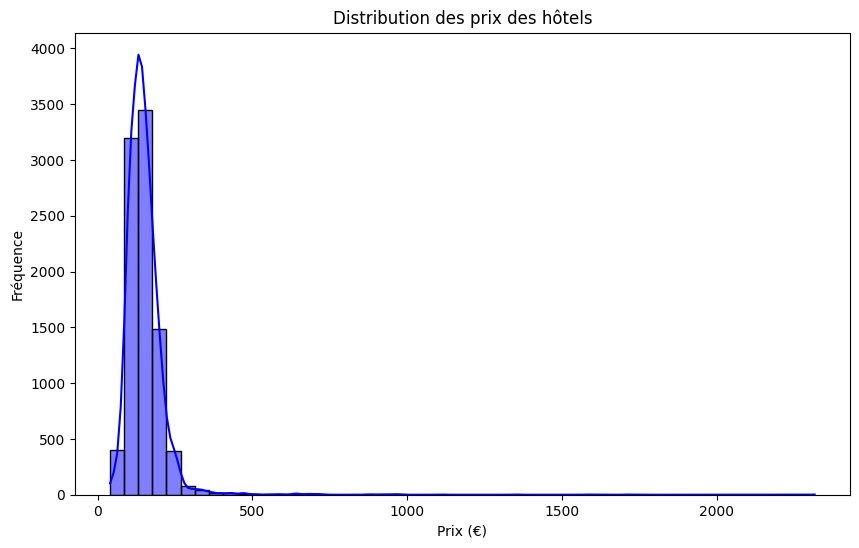

In [ ]:
# 2. Produire des visualisations pertinentes
# Histogramme des prix
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution des prix des hôtels')
plt.xlabel('Prix (€)')
plt.ylabel('Fréquence')
plt.show()

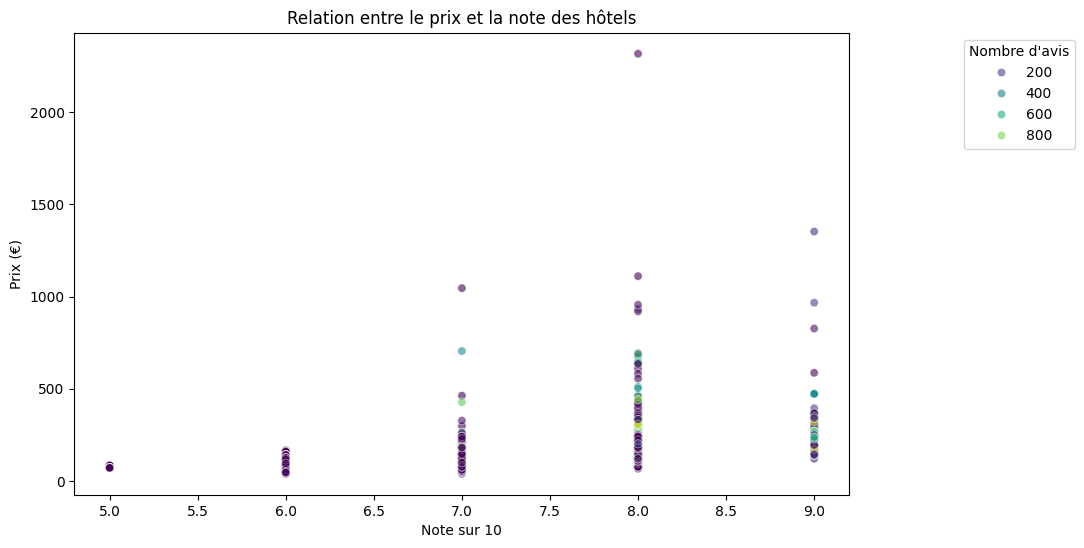

In [ ]:
# Nuage de points : Prix vs Notes
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='rating', y='price', alpha=0.6, hue='reviews', palette='viridis')
plt.title('Relation entre le prix et la note des hôtels')
plt.xlabel('Note sur 10')
plt.ylabel('Prix (€)')
plt.legend(title="Nombre d'avis", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


<ipython-input-2-b4d034a7ac26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['review_category'] = pd.cut(
<ipython-input-2-b4d034a7ac26>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_reviews = filtered_data.groupby('review_category')['price'].mean().reset_index()
<ipython-input-2-b4d034a7ac26>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_by_reviews, x='review_cate

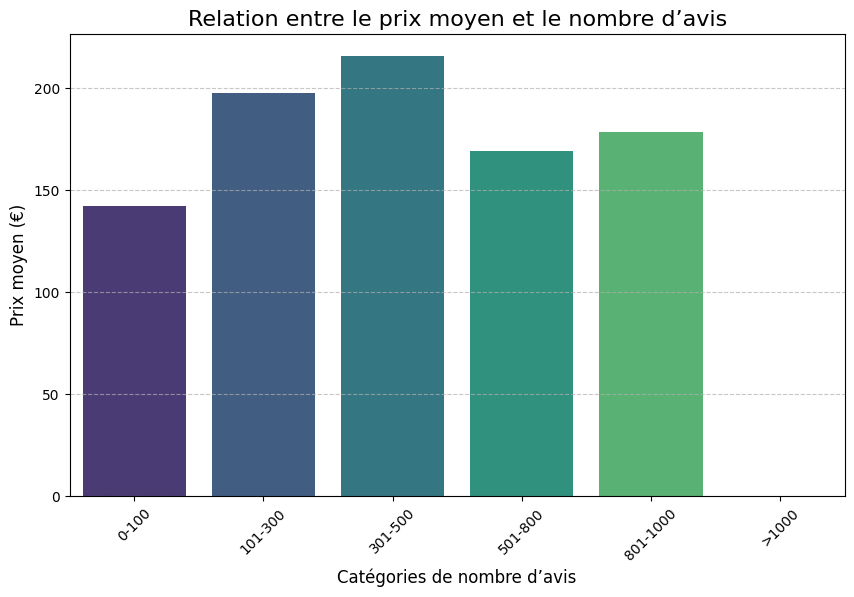

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données nettoyées
data = pd.read_csv('hotels_cleaned.csv')  # Remplacez par le chemin de votre fichier CSV

# Filtrer les données pour éviter les anomalies (si nécessaire)
filtered_data = data[(data['price'] > 0) & (data['reviews'] > 0)]

# Regrouper les données par intervalle d'avis pour une meilleure lisibilité
filtered_data['review_category'] = pd.cut(
    filtered_data['reviews'],
    bins=[0, 100, 300, 500, 800, 1000, 5000],
    labels=['0-100', '101-300', '301-500', '501-800', '801-1000', '>1000']
)

# Calculer les prix moyens par catégorie de nombre d'avis
price_by_reviews = filtered_data.groupby('review_category')['price'].mean().reset_index()

# Générer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=price_by_reviews, x='review_category', y='price', palette='viridis')

# Ajouter des détails au graphique
plt.title('Relation entre le prix moyen et le nombre d’avis', fontsize=16)
plt.xlabel('Catégories de nombre d’avis', fontsize=12)
plt.ylabel('Prix moyen (€)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Sauvegarder le graphique en PNG
plt.savefig('relation_prix_avis.png', bbox_inches='tight')

# Afficher le graphique
plt.show()


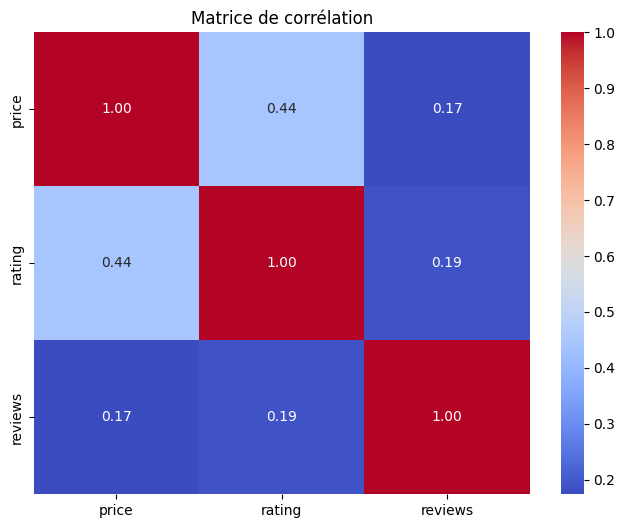

In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Vérifier si des colonnes numériques sont présentes
if not numeric_data.empty:
    # Carte de chaleur pour les corrélations
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matrice de corrélation')
    plt.show()
else:
    print("Aucune colonne numérique disponible pour calculer les corrélations.")


In [ ]:
# Identifier des tendances ou des anomalies
# Exemple : Afficher les hôtels avec les prix les plus élevés
high_price_hotels = data.nlargest(10, 'price')
print("Hôtels les plus chers:")
print(high_price_hotels[['name', 'price', 'rating', 'reviews']])

Hôtels les plus chers:
                                                   name  price  rating  \
9041                          Hotel Ekta Champs Elysées   2317     8.0   
7987       Appartement d'exception - Proche Tour Eiffel   1714     NaN   
7675                          Luxury Eiffel Tower Paris   1588     NaN   
7397                                   J.K. Place Paris   1353     9.0   
7797                                  Courcelles Etoile   1111     8.0   
8989                                   Pavillon Monceau   1046     7.0   
5054  ILE SAINT LOUIS 2 CHAMMBRES 2 SALLE DE BAINS P...    970     NaN   
8504    Hotel Splendide Royal Paris - Relais & Châteaux    967     9.0   
7609     TROCADERO/ EIFFEL TOWER - 3 Bedrooms- All New!    956     8.0   
1529  Prince de Galles, un hôtel Luxury Collection, ...    932     8.0   

      reviews  
9041      1.0  
7987      5.0  
7675    134.0  
7397    141.0  
7797      2.0  
8989      2.0  
5054      NaN  
8504    209.0  
7609     35.0  
15

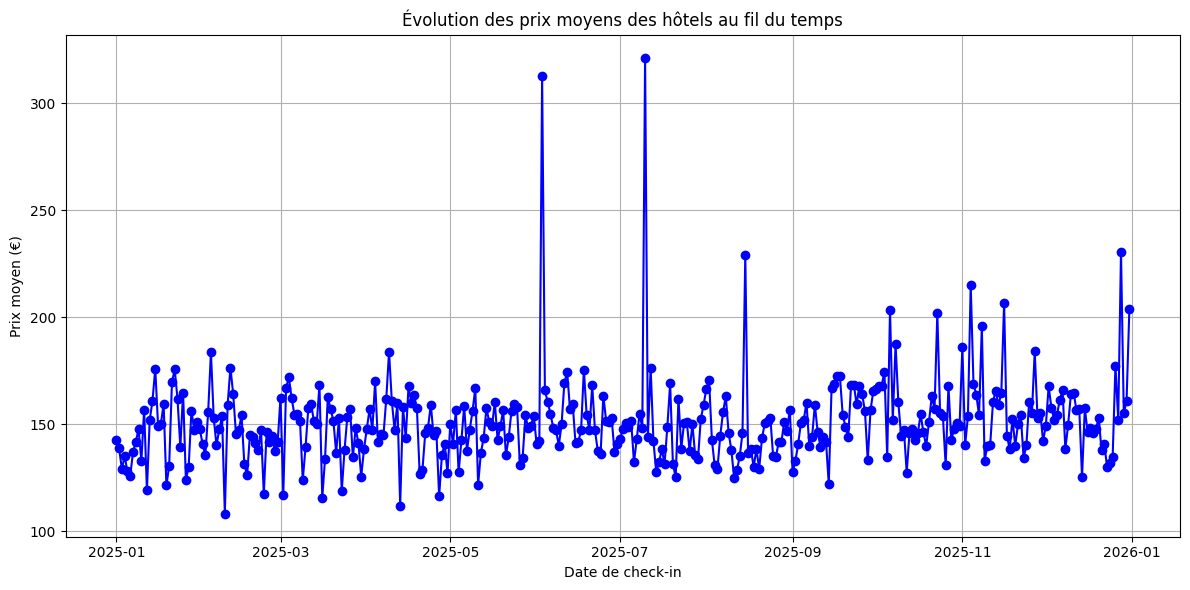

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir les colonnes de date en format datetime (si ce n'est pas déjà fait)
data['checkin_date'] = pd.to_datetime(data['checkin_date'], errors='coerce')
data['checkout_date'] = pd.to_datetime(data['checkout_date'], errors='coerce')

# Grouper les prix par date de check-in
price_by_date = data.groupby('checkin_date')['price'].mean().reset_index()

# Tracer le graphique de l'évolution des prix
plt.figure(figsize=(12, 6))
plt.plot(price_by_date['checkin_date'], price_by_date['price'], marker='o', linestyle='-', color='b')
plt.title("Évolution des prix moyens des hôtels au fil du temps")
plt.xlabel("Date de check-in")
plt.ylabel("Prix moyen (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Analyse principale
# Catégorisation des hôtels par note
data['rating_category'] = pd.cut(data['rating'], bins=[0, 5, 8, 10], labels=['Low', 'Medium', 'High'])


In [ ]:
# Analyse des prix moyens par catégorie de note
rating_analysis = data.groupby('rating_category')['price'].mean()
print("Prix moyen par catégorie de note:")
print(rating_analysis)

Prix moyen par catégorie de note:
rating_category
Low        78.500000
Medium    145.007549
High      219.883392
Name: price, dtype: float64


<ipython-input-7-ede6ff1ca119>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_analysis = data.groupby('rating_category')['price'].mean()


<ipython-input-8-2b5ba988d11e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_analysis.index, y=rating_analysis.values, palette='muted')


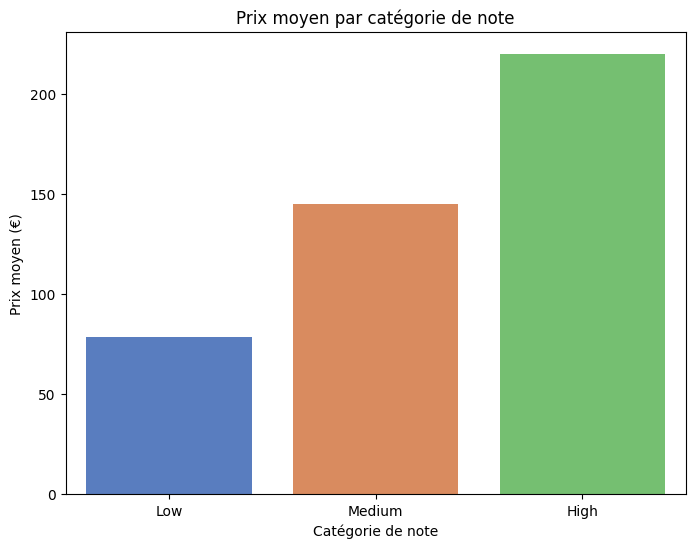

In [ ]:
# Visualisation des prix moyens par catégorie de note
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_analysis.index, y=rating_analysis.values, palette='muted')
plt.title('Prix moyen par catégorie de note')
plt.xlabel('Catégorie de note')
plt.ylabel('Prix moyen (€)')
plt.show()

In [ ]:
# Interprétation des résultats
interpretation = """
1. Les hôtels avec des notes élevées ont tendance à avoir des prix plus élevés, bien que des exceptions existent.
2. Les hôtels avec un grand nombre d'avis semblent avoir une relation positive avec le prix.
3. La distribution des prix montre une concentration autour de 50-200€.
"""
print("Interprétation des résultats:")
print(interpretation)

Interprétation des résultats:

1. Les hôtels avec des notes élevées ont tendance à avoir des prix plus élevés, bien que des exceptions existent.
2. Les hôtels avec un grand nombre d'avis semblent avoir une relation positive avec le prix.
3. La distribution des prix montre une concentration autour de 50-200€.

